In [1]:
import VESIcal as v
import pandas as pd
import numpy as np
import os
import Thermobar as pt
# %pip install Thermobar

In [45]:
out=pt.import_excel("MI_compilation_XH2O.xlsx", sheet_name="Rasmussen_Antarctica")

# This subdivdes outputs into a dataframe for all inputs (my_input), ols, and liqs
my_input=out['my_input']
myOls=out['Ols']
myLiquids1=out['Liqs']

## Lets check the outputs have loaded right
display(myOls.head())
display(myLiquids1.head())

,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,41.942653,2.880650,12.300670,11.682129,0.155416,10.656423,13.236139,2.983601,1.110683,0.0,0.523664,1.301737,0.0,0.0,0.0,0.747794,Rasmussen_2017_Antarctica_1
1,43.408638,3.090624,11.630273,11.914487,0.174623,10.330524,12.386310,2.843573,1.266015,0.0,0.640945,1.314632,0.0,0.0,0.0,0.545111,Rasmussen_2017_Antarctica_2
2,42.354162,3.652759,12.843636,12.094801,0.183381,8.960907,12.128944,3.249320,1.388742,0.0,0.702797,1.346119,0.0,0.0,0.0,0.600606,Rasmussen_2017_Antarctica_3
3,41.702332,3.464190,15.262690,11.732032,0.193613,7.135893,10.812561,4.649699,2.033437,0.0,0.847927,1.231182,0.0,0.0,0.0,0.374704,Rasmussen_2017_Antarctica_4
4,42.123957,3.954223,16.045478,9.516122,0.192961,4.242181,12.928410,4.709246,2.126533,0.0,0.904444,2.016693,0.0,0.0,0.0,0.668844,Rasmussen_2017_Antarctica_5


In [47]:
my_input

,Sample_ID_Liq,Sample,Unnamed: 2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,...,Total,Host Fo,Ol. Add. (wt.%),FeOt Add. (wt.%),Entrap. T (˚C)b,Quench T (˚C)b,Entrap. P (MPa)c,OS - Ascent Rate (m/s)d,CS0 - Ascent Rate (m/s)d,CS4 - Ascent Rate (m/s)d
0,Rasmussen_2017_Antarctica_1,14T-5,Mt. Terror,41.942653,2.880650,12.300670,2.165932,9.732834,0.155416,10.656423,...,100.0,88.12,21.920668,5.612966,1235.899732,1066.345391,730.0000,NaN,NaN,NaN
1,Rasmussen_2017_Antarctica_2,14T-21,Mt. Terror,43.408638,3.090624,11.630273,2.157980,9.972348,0.174623,10.330524,...,100.0,87.40,19.393557,4.607995,1231.806095,1215.808514,670.0000,NaN,NaN,NaN
2,Rasmussen_2017_Antarctica_3,14T-22,Mt. Terror,42.354162,3.652759,12.843636,2.194629,10.119679,0.183381,8.960907,...,100.0,85.40,15.956809,4.361198,1199.957742,1086.474819,610.0000,NaN,NaN,NaN
3,Rasmussen_2017_Antarctica_4,14T-26,Mt. Terror,41.702332,3.464190,15.262690,2.223079,9.731305,0.193613,7.135893,...,100.0,83.51,10.567686,2.801235,1160.335184,1085.078430,316.6740,NaN,NaN,NaN
4,Rasmussen_2017_Antarctica_5,14T-27,Mt. Terror,42.123957,3.954223,16.045478,1.932582,7.776837,0.192961,4.242181,...,100.0,78.56,2.362562,0.134000,1062.219341,1019.587458,375.2222,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Rasmussen_2017_Antarctica_74,376-4,DVDP Hole 3,42.131724,3.744558,12.509280,2.275676,10.056189,0.187327,8.643803,...,100.0,85.12,9.857409,2.104555,1193.798164,1120.462628,454.9574,0.018018,0.094737,0.214286
74,Rasmussen_2017_Antarctica_75,376-4B,DVDP Hole 3,42.524741,3.722019,12.403091,2.285433,10.065039,0.211467,8.693978,...,100.0,85.12,12.500000,2.145658,1191.404097,1179.561284,409.7342,0.006923,0.065455,0.152542
75,Rasmussen_2017_Antarctica_76,376-13,DVDP Hole 3,42.243044,3.795631,12.814479,2.282548,10.116380,0.202805,9.052649,...,100.0,85.74,13.043478,2.339253,1197.777224,1105.661346,330.1840,0.000632,0.006207,0.016216
76,Rasmussen_2017_Antarctica_77,376-33A,DVDP Hole 3,42.819471,3.743051,12.753806,2.235295,10.073240,0.216672,8.498893,...,100.0,84.71,10.000000,1.575370,1184.143588,1107.620234,333.1976,0.004186,0.036735,0.089109


In [48]:
T_HT87=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Helz1987_CaO")
# This function 
df_HT87=pt.convert_to_vesical(liq_comps=myLiquids1, 
                              T1=T_HT87, unit='Kelvin', Fe3Fet_Liq=0.15)
df_HT87['Temp_ref']=my_input['Entrap. T (˚C)b']

df_HT87.head()

,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,H2O,NiO,CoO,CO2,Sample_ID,Temp,FeO,Fe2O3,Temp_ref
0,41.942653,2.880650,12.300670,0.155416,10.656423,13.236139,2.983601,1.110683,0.0,0.523664,1.301737,0.0,0.0,0.747794,Rasmussen_2017_Antarctica_1,1187.719907,9.929809,1.947021,1235.899732
1,43.408638,3.090624,11.630273,0.174623,10.330524,12.386310,2.843573,1.266015,0.0,0.640945,1.314632,0.0,0.0,0.545111,Rasmussen_2017_Antarctica_2,1173.612741,10.127314,1.985748,1231.806095
2,42.354162,3.652759,12.843636,0.183381,8.960907,12.128944,3.249320,1.388742,0.0,0.702797,1.346119,0.0,0.0,0.600606,Rasmussen_2017_Antarctica_3,1169.340472,10.280581,2.015800,1199.957742
3,41.702332,3.464190,15.262690,0.193613,7.135893,10.812561,4.649699,2.033437,0.0,0.847927,1.231182,0.0,0.0,0.374704,Rasmussen_2017_Antarctica_4,1147.488520,9.972227,1.955338,1160.335184
4,42.123957,3.954223,16.045478,0.192961,4.242181,12.928410,4.709246,2.126533,0.0,0.904444,2.016693,0.0,0.0,0.668844,Rasmussen_2017_Antarctica_5,1182.611611,8.088704,1.586020,1062.219341


In [49]:
VESIcal_out=v.BatchFile(filename=None, dataframe=df_HT87, label='Sample_ID')
VESIcal_out.data

,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,H2O,NiO,CoO,CO2,Temp,FeO,Fe2O3,Temp_ref
Rasmussen_2017_Antarctica_1,41.942653,2.880650,12.300670,0.155416,10.656423,13.236139,2.983601,1.110683,0.0,0.523664,1.301737,0.0,0.0,0.747794,1187.719907,9.929809,1.947021,1235.899732
Rasmussen_2017_Antarctica_2,43.408638,3.090624,11.630273,0.174623,10.330524,12.386310,2.843573,1.266015,0.0,0.640945,1.314632,0.0,0.0,0.545111,1173.612741,10.127314,1.985748,1231.806095
Rasmussen_2017_Antarctica_3,42.354162,3.652759,12.843636,0.183381,8.960907,12.128944,3.249320,1.388742,0.0,0.702797,1.346119,0.0,0.0,0.600606,1169.340472,10.280581,2.015800,1199.957742
Rasmussen_2017_Antarctica_4,41.702332,3.464190,15.262690,0.193613,7.135893,10.812561,4.649699,2.033437,0.0,0.847927,1.231182,0.0,0.0,0.374704,1147.488520,9.972227,1.955338,1160.335184
Rasmussen_2017_Antarctica_5,42.123957,3.954223,16.045478,0.192961,4.242181,12.928410,4.709246,2.126533,0.0,0.904444,2.016693,0.0,0.0,0.668844,1182.611611,8.088704,1.586020,1062.219341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rasmussen_2017_Antarctica_74,42.131724,3.744558,12.509280,0.187327,8.643803,12.773917,3.285656,1.441129,0.0,0.752281,1.312280,0.0,0.0,0.546552,1180.047018,10.288614,2.017375,1193.798164
Rasmussen_2017_Antarctica_75,42.524741,3.722019,12.403091,0.211467,8.693978,13.024586,3.228596,1.389925,0.0,0.726732,1.004717,0.0,0.0,0.396855,1184.208122,10.303601,2.020314,1191.404097
Rasmussen_2017_Antarctica_76,42.243044,3.795631,12.814479,0.202805,9.052649,12.713077,3.338326,1.471329,0.0,0.771454,0.610403,0.0,0.0,0.246959,1179.037071,10.345033,2.028438,1197.777224
Rasmussen_2017_Antarctica_77,42.819471,3.743051,12.753806,0.216672,8.498893,12.434762,3.339525,1.431225,0.0,0.770277,1.073419,0.0,0.0,0.280082,1174.417043,10.272217,2.014160,1184.143588


In [50]:
# First lets use the default model MagmaSat
SatP_HT87=VESIcal_out.calculate_saturation_pressure(temperature="Temp")
SatP_HT87.head()

[====================] 100%  Working on sample Rasmussen_2017_Antarctic...                            


,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,...,Fe2O3,Temp,Temp_ref,SaturationP_bars_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
Rasmussen_2017_Antarctica_1,41.942653,2.880650,12.300670,0.155416,10.656423,13.236139,2.983601,1.110683,0.0,0.523664,...,1.947021,1187.719907,1235.899732,3920,0.109083,0.890917,0.000653,0.000653,MagmaSat,
Rasmussen_2017_Antarctica_2,43.408638,3.090624,11.630273,0.174623,10.330524,12.386310,2.843573,1.266015,0.0,0.640945,...,1.985748,1173.612741,1231.806095,3600,0.117193,0.882807,0.000949,0.000949,MagmaSat,
Rasmussen_2017_Antarctica_3,42.354162,3.652759,12.843636,0.183381,8.960907,12.128944,3.249320,1.388742,0.0,0.702797,...,2.015800,1169.340472,1199.957742,3560,0.125523,0.874477,0.000106,0.000106,MagmaSat,
Rasmussen_2017_Antarctica_4,41.702332,3.464190,15.262690,0.193613,7.135893,10.812561,4.649699,2.033437,0.0,0.847927,...,1.955338,1147.488520,1160.335184,1790,0.166859,0.833141,0.002352,0.002352,MagmaSat,
Rasmussen_2017_Antarctica_5,42.123957,3.954223,16.045478,0.192961,4.242181,12.928410,4.709246,2.126533,0.0,0.904444,...,1.586020,1182.611611,1062.219341,3100,0.222520,0.777480,0.002377,0.002377,MagmaSat,


In [51]:
# First lets use the default model MagmaSat
SatP_HT87_ref=VESIcal_out.calculate_saturation_pressure(temperature="Temp_ref")
SatP_HT87_ref.head()

[====================] 100%  Working on sample Rasmussen_2017_Antarctic...                            


/tmp/ipykernel_65/559183096.py:2: UserWarning: Temperature for sample Rasmussen_2017_Antarctica_78 is <=0. Skipping sample.
  SatP_HT87_ref=VESIcal_out.calculate_saturation_pressure(temperature="Temp_ref")


,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,...,Fe2O3,Temp,Temp_ref,SaturationP_bars_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
Rasmussen_2017_Antarctica_1,41.942653,2.880650,12.300670,0.155416,10.656423,13.236139,2.983601,1.110683,0.0,0.523664,...,1.947021,1187.719907,1235.899732,3980.0,0.110640,0.889360,0.002076,0.002076,MagmaSat,
Rasmussen_2017_Antarctica_2,43.408638,3.090624,11.630273,0.174623,10.330524,12.386310,2.843573,1.266015,0.0,0.640945,...,1.985748,1173.612741,1231.806095,3650.0,0.118535,0.881465,0.001766,0.001766,MagmaSat,
Rasmussen_2017_Antarctica_3,42.354162,3.652759,12.843636,0.183381,8.960907,12.128944,3.249320,1.388742,0.0,0.702797,...,2.015800,1169.340472,1199.957742,3590.0,0.124504,0.875496,0.000532,0.000532,MagmaSat,
Rasmussen_2017_Antarctica_4,41.702332,3.464190,15.262690,0.193613,7.135893,10.812561,4.649699,2.033437,0.0,0.847927,...,1.955338,1147.488520,1160.335184,1800.0,0.166221,0.833779,0.002827,0.002827,MagmaSat,
Rasmussen_2017_Antarctica_5,42.123957,3.954223,16.045478,0.192961,4.242181,12.928410,4.709246,2.126533,0.0,0.904444,...,1.586020,1182.611611,1062.219341,2920.0,0.230526,0.769474,0.000903,0.000903,MagmaSat,


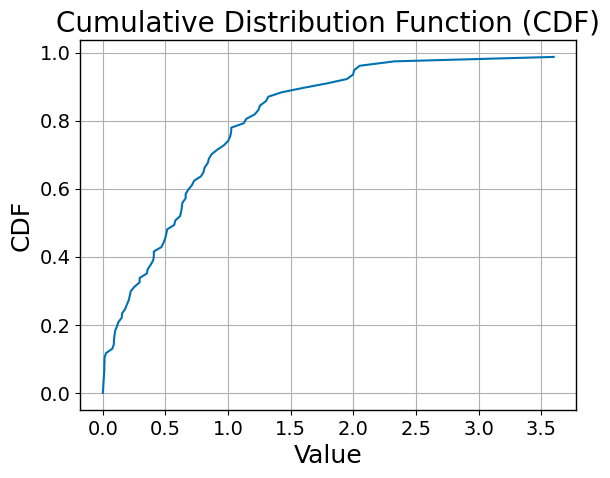

In [75]:
percentPdiff=100*(SatP_HT87_ref['XH2O_fl_VESIcal']-SatP_HT87['XH2O_fl_VESIcal'])/SatP_HT87['XH2O_fl_VESIcal']
import numpy as np
import matplotlib.pyplot as plt

# Assuming percentPdiff is a pandas Series containing your data
data = abs(percentPdiff.values)

# Sort the data
sorted_data = np.sort(data)

# Calculate the cumulative distribution function (CDF)
cdf = np.linspace(0, 1, len(sorted_data))

# Plot the CDF
plt.plot(sorted_data, cdf)
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()



In [73]:
cdf

array([0.        , 0.01298701, 0.02597403, 0.03896104, 0.05194805,
       0.06493506, 0.07792208, 0.09090909, 0.1038961 , 0.11688312,
       0.12987013, 0.14285714, 0.15584416, 0.16883117, 0.18181818,
       0.19480519, 0.20779221, 0.22077922, 0.23376623, 0.24675325,
       0.25974026, 0.27272727, 0.28571429, 0.2987013 , 0.31168831,
       0.32467532, 0.33766234, 0.35064935, 0.36363636, 0.37662338,
       0.38961039, 0.4025974 , 0.41558442, 0.42857143, 0.44155844,
       0.45454545, 0.46753247, 0.48051948, 0.49350649, 0.50649351,
       0.51948052, 0.53246753, 0.54545455, 0.55844156, 0.57142857,
       0.58441558, 0.5974026 , 0.61038961, 0.62337662, 0.63636364,
       0.64935065, 0.66233766, 0.67532468, 0.68831169, 0.7012987 ,
       0.71428571, 0.72727273, 0.74025974, 0.75324675, 0.76623377,
       0.77922078, 0.79220779, 0.80519481, 0.81818182, 0.83116883,
       0.84415584, 0.85714286, 0.87012987, 0.88311688, 0.8961039 ,
       0.90909091, 0.92207792, 0.93506494, 0.94805195, 0.96103

In [74]:
sorted_data

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25575448, 0.26385224, 0.29850746, 0.31347962,
       0.32894737, 0.33444816, 0.35211268, 0.35587189, 0.37878788,
       0.37878788, 0.40983607, 0.42016807, 0.43478261, 0.46296296,
       0.46728972, 0.50632911, 0.51679587, 0.52356021, 0.55865922,
       0.56818182, 0.58823529, 0.61349693, 0.63492063, 0.66225166,
       0.67264574, 0.72202166, 0.81743869, 0.82304527, 0.82644628,
       0.84269663, 0.86206897, 0.86580087, 0.94339623, 0.97087379,
       1.06100796, 1.07142857, 1.12359551, 1.171875  , 1.17302053,
       1.19760479, 1.24481328, 1.2755102 , 1.38888889, 1.38888889,
       1.44092219, 1.45454545, 1.53061224, 1.83727034, 1.97628458,
       2.13523132, 2.20588235, 2.45398773, 2.73037543, 3.21100

In [26]:
SatP_HT87.to_excel("Rasmussen_2017.xlsx")